In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Directorio Andrea
# file_path = '/content/drive/MyDrive/DATA_PIS3/21_10/21_10/Andrea/Andrea_lee.acq.txt'
# file_path = 'DATA/21_10/Andrea/Andrea_lee.acq.txt'

#Directorio Juliana 21/11/2022
#file_path = 'DATA/21_11/Juliana_preciado.csv'
file_path = 'DATA/Juliana_preciado_21_11/Juliana_preciado_ajustado.txt'

TXT - Andrea

In [6]:
# --------------- Lectura y detección de encabezado ---------------
import pandas as pd

# Leemos de forma segura (latin-1) las primeras N líneas para detectar la estructura
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    preview_lines = [next(f) for _ in range(200)]  # toma hasta 200 líneas de vista previa 

# Buscamos la línea que contiene los nombres de columna (en tu ejemplo empieza con "min\tCH1\t...")
header_idx = None
for i, ln in enumerate(preview_lines):
    if ln.strip().startswith('min') or ln.strip().startswith('time') or ln.strip().lower().startswith('time'):
        header_idx = i
        break

# Leemos la línea del encabezado para tomar los nombres
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    for _ in range(header_idx):
        next(f)
    header_line = next(f).strip()

col_names = header_line.split()  # split por whitespace (tabs)

# Ahora detectamos si la siguiente línea es la de 'samples' (tiene la palabra 'samples')
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    for _ in range(header_idx + 1):
        next(f)
    second_line = next(f).strip()
# Si la segunda línea contiene 'samples', la marcamos para que pandas la salte
skiprows = None
if 'samples' in second_line.lower():
    skiprows = list(range(header_idx + 1, header_idx + 2))

# --------------- Cargar con pandas ---------------
df = pd.read_csv(    file_path,    sep='\t',    header=header_idx,
    skiprows=skiprows,    encoding='latin-1',    engine='python'
)
# Si pandas no separó correctamente (p. ej. columnas juntas), intentamos con delim_whitespace=True
if df.shape[1] == 1:
    df = pd.read_csv(        file_path,        delim_whitespace=True,
        header=header_idx,        skiprows=skiprows,        encoding='latin-1',        engine='python'
    )


# Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

if 'min' in df.columns:
    df = df.rename(columns={'min':'time'})

# Convertir todas las columnas numéricas a float (ignora errores)
for c in df.columns:
    # preserva columnas no numéricas si las hubiera
    try:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(',', '.'), errors='coerce')
    except Exception:
        pass
# Renombrar columnas según correspondencia
df.rename(columns={
    'CH1': 'SpO2',    'CH3': 'RSP',    'CH5': 'PPG',    'CH9': 'Rate',
    'CH13': 'Status',    'CH14': 'EDA',    'CH15': 'ECG','CH110': 'Face Reader'
}, inplace=True)

# Mostrar resumen
print("Ruta:", file_path)
print("Encabezado detectado en la línea:", header_idx)
print("Primeras columnas:", list(df.columns[:10]))
print("Tamaño del DataFrame:", df.shape)
display(df.head())



Ruta: DATA/Juliana_preciado_21_11/Juliana_preciado_ajustado.txt
Encabezado detectado en la línea: 37
Primeras columnas: ['6.66667E-05', '125.871', '0.00213623', '0.0424194', '509.135', '0.00585938', '-0.00152721', '-0.107422', '0', '0.1']
Tamaño del DataFrame: (2085856, 17)


,6.66667E-05,125.871,0.00213623,0.0424194,509.135,0.00585938,-0.00152721,-0.107422,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,0.000075,125.871,0.002441,0.042114,509.120,0.005859,-0.001527,0.093994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000083,125.868,0.002136,0.042419,509.151,0.005859,-0.003053,0.303040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000092,125.868,0.001831,0.041504,509.135,0.004883,-0.000001,0.514679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,125.864,0.002136,0.041199,509.104,0.006348,0.001525,0.721588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000108,125.856,0.001831,0.041199,509.135,0.006836,-0.000001,0.914764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TXT con comillas ajustado (Juli) - Abrir archivo con block de notas y guardarlo como txt

In [8]:
# --------------------- LECTURA Y DETECCIÓN DE ENCABEZADO (ROBUSTO) ---------------------
import pandas as pd

# Leemos de forma segura (latin-1) las primeras N líneas para detectar la estructura
with open(file_path, 'r', encoding='latin-1', errors='replace') as f:
    preview_lines = [next(f) for _ in range(200)] 

# Buscamos la línea que contiene los nombres de columna (min, time, etc.)
header_idx = None
for i, ln in enumerate(preview_lines):
    if ln.strip().startswith('min') or ln.strip().startswith('time') or ln.strip().lower().startswith('time'):
        header_idx = i
        break

if header_idx is None:
    raise ValueError("No se pudo encontrar la línea de encabezado ('min' o 'time') en las primeras 200 líneas.")

# Obtenemos la lista de nombres de columna de la línea detectada
header_line = preview_lines[header_idx].strip()
col_names = header_line.split() # split por whitespace (tabs o espacios)

# Ahora detectamos si la siguiente línea es la de 'samples'
second_line = preview_lines[header_idx + 1].strip()

# Si la segunda línea contiene 'samples', la marcamos para que pandas la salte
skiprows = None
if 'samples' in second_line.lower():
    skiprows = list(range(header_idx + 1, header_idx + 2))

# --------------- Cargar con pandas ---------------
df = pd.read_csv( 
    file_path, 
    sep='\t', 
    header=header_idx, # Usamos la línea detectada como encabezado
    skiprows=skiprows, 
    encoding='latin-1', 
    engine='python'
)

# Si pandas no separó correctamente, intentamos con delim_whitespace=True
if df.shape[1] == 1:
    df = pd.read_csv( 
        file_path, 
        delim_whitespace=True, # Usa cualquier espacio en blanco
        header=header_idx, 
        skiprows=skiprows, 
        encoding='latin-1', 
        engine='python'
    )

# Eliminar columnas completamente vacías (esto maneja el problema de 'Unnamed: X')
df = df.dropna(axis=1, how='all')

# Si la longitud del encabezado detectado manualmente es igual a la longitud de las columnas resultantes,
# forzamos los nombres de columna para garantizar la coherencia.
if df.shape[1] == len(col_names):
    df.columns = col_names 
elif df.shape[1] == len(col_names) - 1: # A veces hay un espacio final que agrega una columna vacía que pandas dropea
    # Si falta una columna, es probable que haya sido una columna vacía eliminada.
    df.columns = col_names[:-1] # Usamos todos excepto el último (que probablemente fue el espacio extra)
    
if 'min' in df.columns:
    df = df.rename(columns={'min':'time'})

# Convertir todas las columnas numéricas a float
for c in df.columns:
    try:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(',', '.'), errors='coerce')
    except Exception:
        pass
        
# Renombrar columnas según correspondencia (CH2 en lugar de CH3 para RSP)
df.rename(columns={
    'CH1': 'SpO2', 
    'CH2': 'RSP', # CORRECCIÓN: Usar CH2
    'CH5': 'PPG', 
    'CH9': 'Rate',
    'CH13': 'Status', 
    'CH14': 'EDA', 
    'CH15': 'ECG',
    'CH110': 'Neutral_FR', # Usar nombres claros para FaceReader
    'CH111': 'Angry_FR', 
    'CH112': 'Happy_FR', 
    'CH113': 'Sad_FR', 
    'CH114': 'Scared_FR', 
    'CH115': 'Surprised_FR', 
    'CH116': 'Disgusted_FR', 
    'CH117': 'Valence_FR', 
    'CH118': 'Arousal_FR'
}, inplace=True)


# Mostrar resumen
print("Ruta:", file_path)
print("Encabezado detectado en la línea:", header_idx)
print("Primeras columnas:", list(df.columns[:10]))
print("Tamaño del DataFrame:", df.shape)
display(df.head())

Ruta: DATA/Juliana_preciado_21_11/Juliana_preciado_ajustado.txt
Encabezado detectado en la línea: 37
Primeras columnas: ['time', 'SpO2', 'RSP', 'PPG', 'Rate', 'Status', 'EDA', 'ECG', 'Neutral_FR', 'Angry_FR']
Tamaño del DataFrame: (2085856, 17)


,time,SpO2,RSP,PPG,Rate,Status,EDA,ECG,Neutral_FR,Angry_FR,Happy_FR,Sad_FR,Scared_FR,Surprised_FR,Disgusted_FR,Valence_FR,Arousal_FR
0,0.000075,125.871,0.002441,0.042114,509.120,0.005859,-0.001527,0.093994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000083,125.868,0.002136,0.042419,509.151,0.005859,-0.003053,0.303040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000092,125.868,0.001831,0.041504,509.135,0.004883,-0.000001,0.514679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000100,125.864,0.002136,0.041199,509.104,0.006348,0.001525,0.721588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000108,125.856,0.001831,0.041199,509.135,0.006836,-0.000001,0.914764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


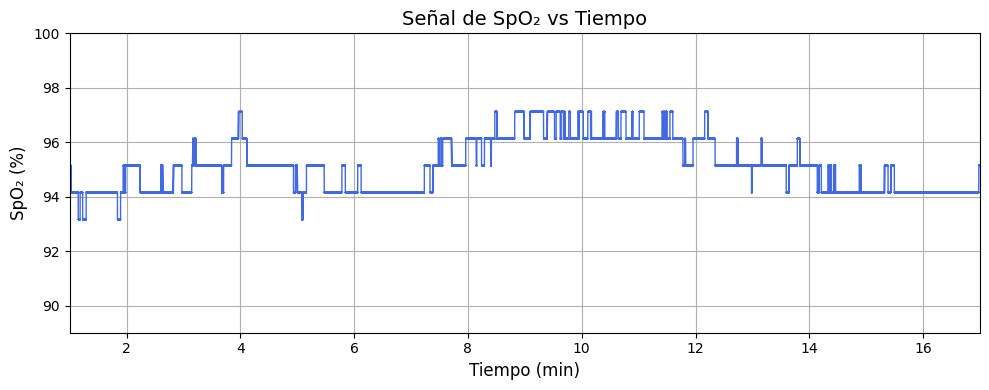

In [34]:
#Gráfica SpO2

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['SpO2'], color='royalblue', linewidth=1)
plt.title('Señal de SpO₂ vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('SpO₂ (%)', fontsize=12)
plt.xlim(1,17)
plt.ylim(89,100)
plt.grid(True)
plt.tight_layout()
plt.show()


The Dual Wireless Respiration and ECG BioNomadix Transmitter

    RSP (CH A)–measure abdominal or thoracic expansion and contraction while breathing
    ECG (CH B)–record electrical activity generated by the heart
*Record with BioShirt (BN-BIOSHIRT contains a respiration sensor) or respiration transducer (BN-RESP-XDCR) 
https://www.biopac.com/product/bionomadix-wireless-rsp-with-ecg-transmitter/

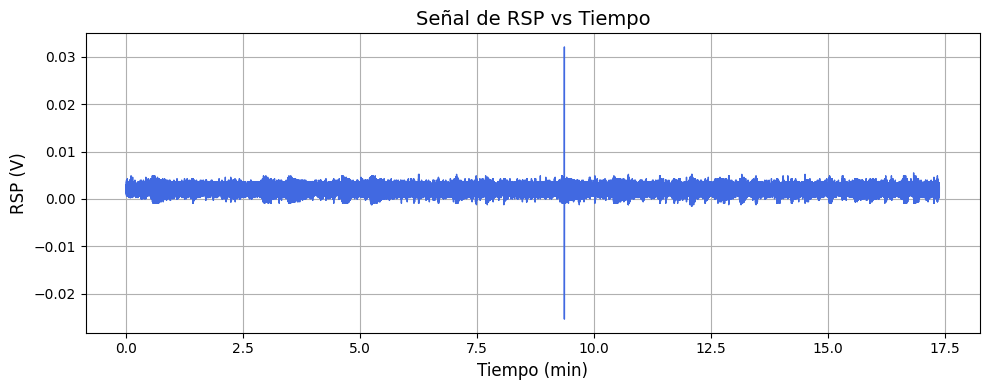

In [11]:
#Gráfica RSP

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['RSP'], color='royalblue', linewidth=1)
plt.title('Señal de RSP vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('RSP (V)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

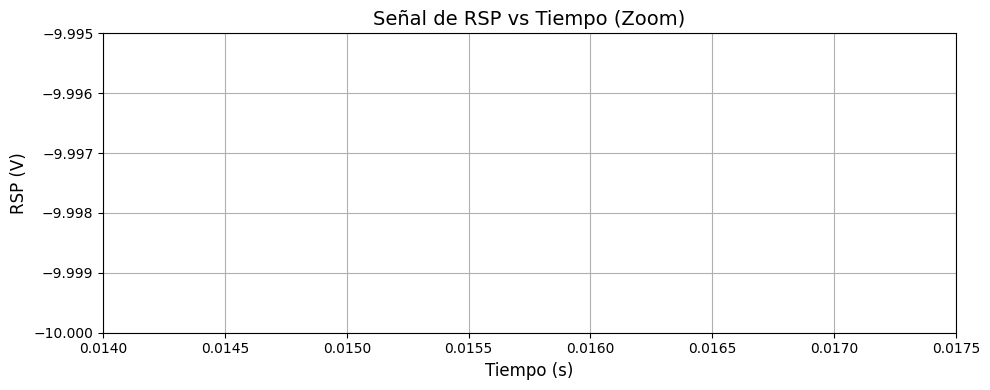

In [12]:
#Gráfica RSP aumetada
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['RSP'], color='royalblue', linewidth=1)
plt.title('Señal de RSP vs Tiempo (Zoom)', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('RSP (V)', fontsize=12)
plt.xlim(0.014, 0.0175)
plt.ylim(-10, -9.9950)
plt.grid(True)
plt.tight_layout()
plt.show()



* The PPG channel measures Blood Volume Pulse (BVP) via optical plethysmographic methods and provides for heart rate, inter-beat interval and vasodilation/constriction data. Heart Rate Variability (HRV) can be performed on the PPG signal data

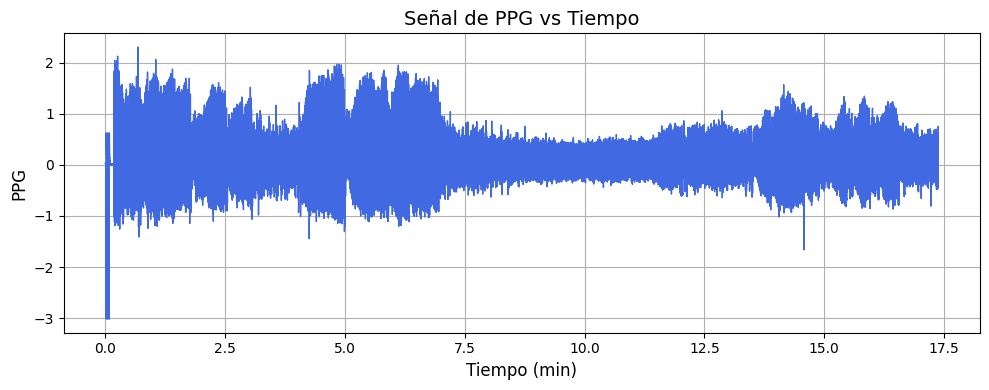

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['PPG'], color='royalblue', linewidth=1)
plt.title('Señal de PPG vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('PPG', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

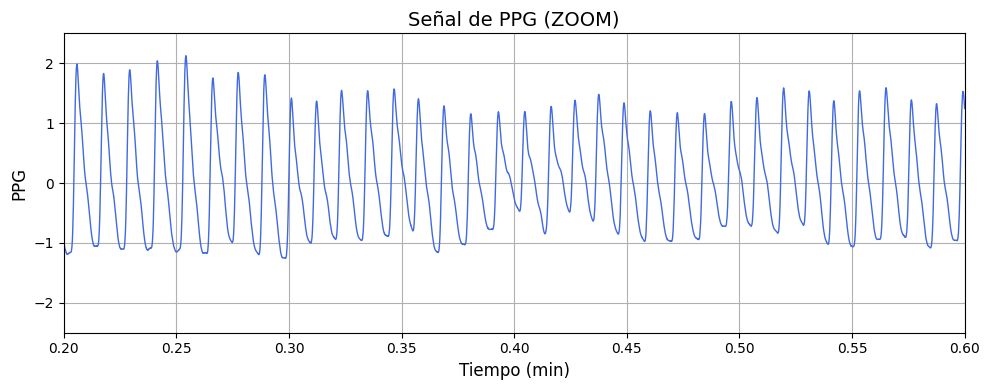

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['PPG'], color='royalblue', linewidth=1)
plt.title('Señal de PPG (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('PPG', fontsize=12)
plt.xlim(0.2, 0.6)
plt.ylim(-2.5, 2.5)
plt.grid(True)
plt.tight_layout()
plt.show()

Heart Rate: ECG spikes indicate when the electrical events leading to a contraction of the heart muscle occur.

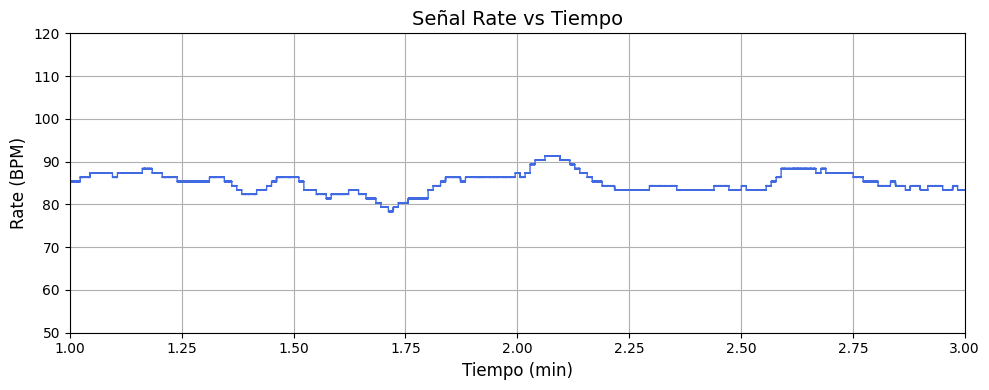

In [29]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['Rate'], color='royalblue', linewidth=1)
plt.title('Señal Rate vs Tiempo', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('Rate (BPM)', fontsize=12)
plt.xlim(1,3)
plt.ylim(50,120)
plt.grid(True)
plt.tight_layout()
plt.show()

https://www.biopac.com/product/bionomadix-ppg-and-eda-amplifier/

* The EDA/GSR channel—also known as Electrodermal Response, Skin Conductance Activity/Response or Galvanic Skin Response (GSR)—provides for indication of eccrine (skin sweating) activity.


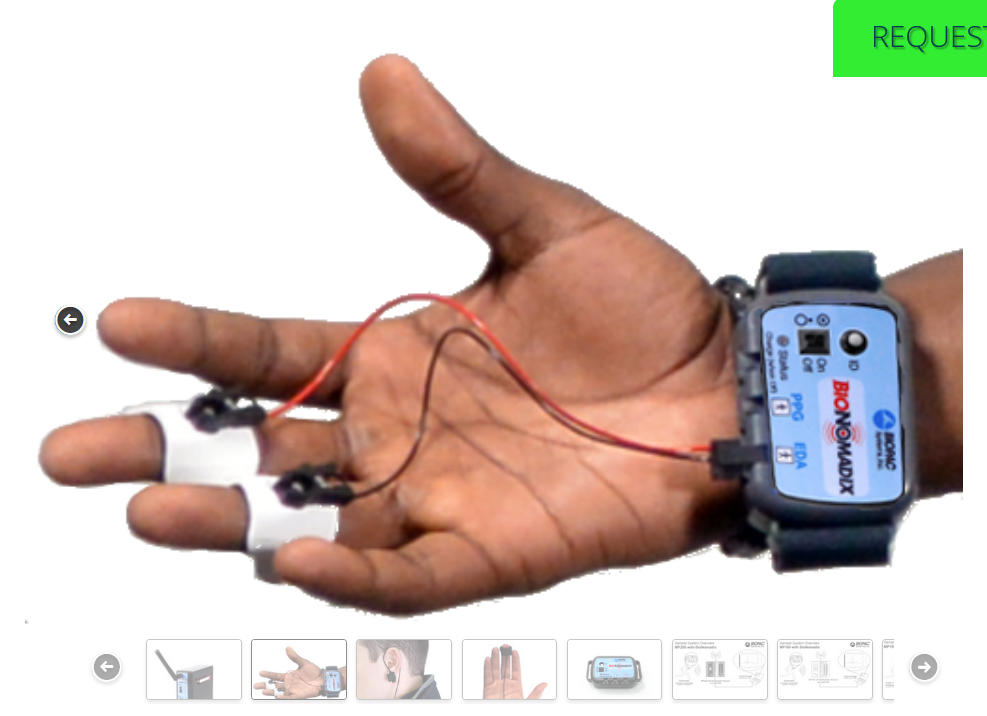

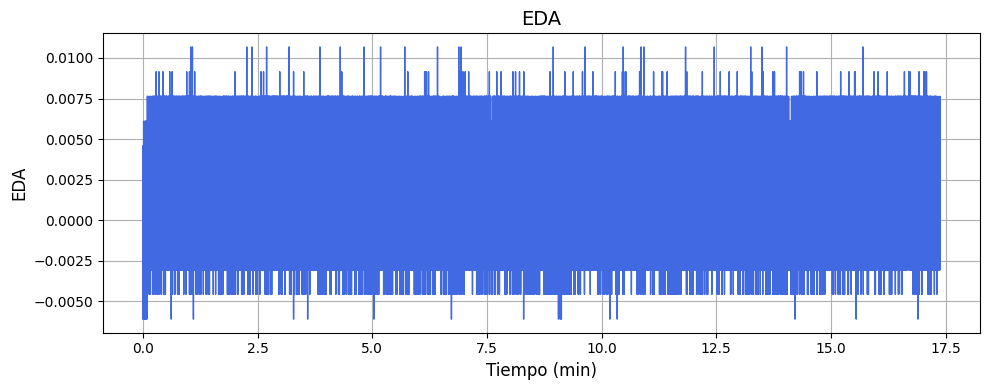

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['EDA'], color='royalblue', linewidth=1)
plt.title('EDA', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('EDA', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

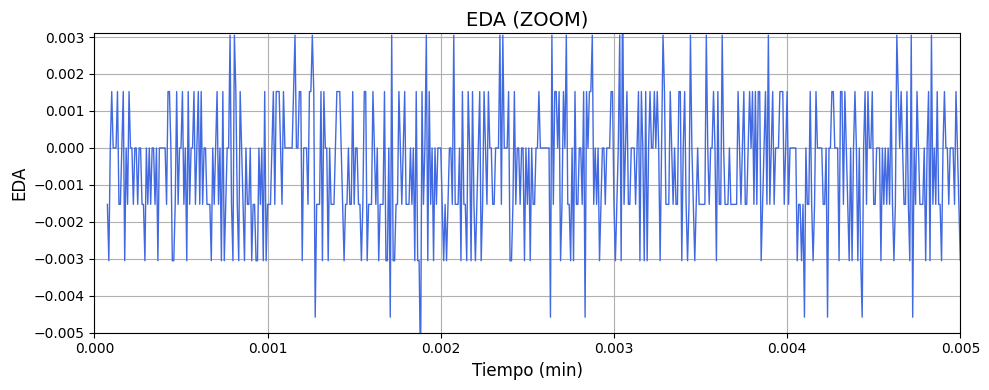

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['EDA'], color='royalblue', linewidth=1)
plt.title('EDA (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('EDA', fontsize=12)
plt.xlim(0,0.005)
plt.ylim(-0.0050,0.0031)
plt.grid(True)
plt.tight_layout()
plt.show()

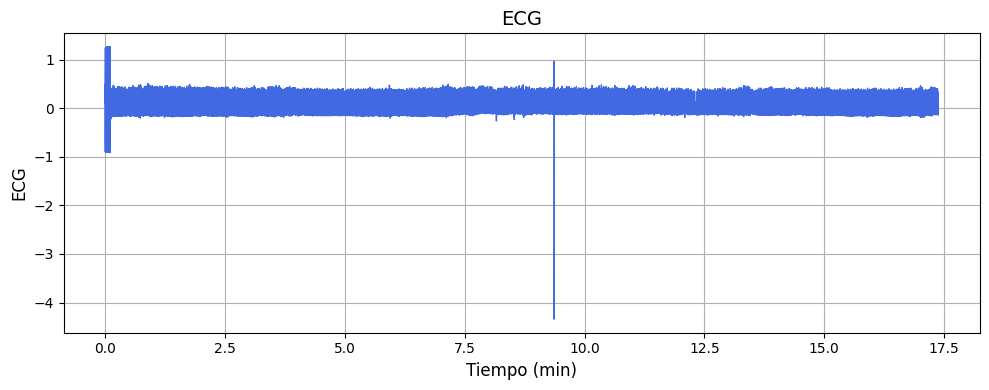

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['ECG'], color='royalblue', linewidth=1)
plt.title('ECG', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('ECG', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

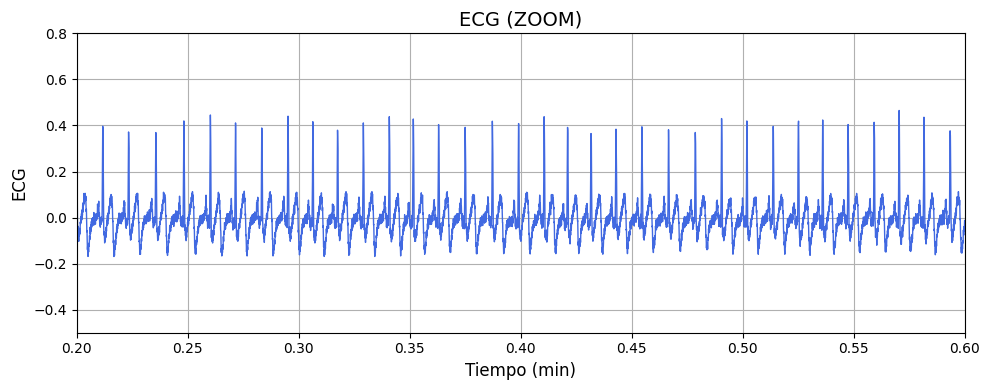

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(df['time'], df['ECG'], color='royalblue', linewidth=1)
plt.title('ECG (ZOOM)', fontsize=14)
plt.xlabel('Tiempo (min)', fontsize=12)
plt.ylabel('ECG', fontsize=12)
plt.ylim(-0.5,0.8)
plt.xlim(0.2,0.6)
plt.grid(True)
plt.tight_layout()
plt.show()